In [322]:
#Load the necesssary libraries
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
from geopy.geocoders import Nominatim
import folium
from folium.plugins import MarkerCluster
from sklearn.metrics import matthews_corrcoef

import seaborn as sns
%matplotlib inline

#### We will start the process by loading the cleaned datasets of Arabica and Robusta.

In [2]:
#Load the datasets
df_arabica=pd.read_csv('arabica_data_cleaned.csv',index_col=[0])
df_robusta=pd.read_csv('robusta_data_cleaned.csv',index_col=[0])

In [3]:
#Let us explore the top 5 rows of arabica dataset
df_arabica.head()

Species                     Owner Country.of.Origin  \
1  Arabica                 metad plc          Ethiopia   
2  Arabica                 metad plc          Ethiopia   
3  Arabica  grounds for health admin         Guatemala   
4  Arabica       yidnekachew dabessa          Ethiopia   
5  Arabica                 metad plc          Ethiopia   

                                  Farm.Name Lot.Number       Mill ICO.Number  \
1                                 metad plc        NaN  metad plc  2014/2015   
2                                 metad plc        NaN  metad plc  2014/2015   
3  san marcos barrancas "san cristobal cuch        NaN        NaN        NaN   
4     yidnekachew dabessa coffee plantation        NaN    wolensu        NaN   
5                                 metad plc        NaN  metad plc  2014/2015   

                                 Company       Altitude        Region  ...  \
1      metad agricultural developmet plc      1950-2200  guji-hambela  ...   
2      metad agricultural developmet plc      1950-2200  guji-hambela  ...   
3                                    NaN  1600 - 1800 m           NaN  ...   
4  yidnekachew debessa coffee plantation      1800-2200        oromia  ...   
5      metad agricultural developmet plc      1950-2200  guji-hambela  ...   

   Color  Category.Two.Defects        Expiration  \
1  Green                     0   April 3rd, 2016   
2  Green                     1   April 3rd, 2016   
3    NaN                     0    May 31st, 2011   
4  Green                     2  March 25th, 2016   
5  Green                     2   April 3rd, 2016   

                   Certification.Body  \
1  METAD Agricultural Development plc   
2  METAD Agricultural Development plc   
3        Specialty Coffee Association   
4  METAD Agricultural Development plc   
5  METAD Agricultural Development plc   

                      Certification.Address  \
1  309fcf77415a3661ae83e027f7e5f05dad786e44   
2  309fcf77415a3661ae83e027f7e5f05dad786e44   
3  36d0d00a3724338ba7937c52a378d085f2172daa   
4  309fcf77415a3661ae83e027f7e5f05dad786e44   
5  309fcf77415a3661ae83e027f7e5f05dad786e44   

                      Certification.Contact unit_of_measurement  \
1  19fef5a731de2db57d16da10287413f5f99bc2dd                   m   
2  19fef5a731de2db57d16da10287413f5f99bc2dd                   m   
3  0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660                   m   
4  19fef5a731de2db57d16da10287413f5f99bc2dd                   m   
5  19fef5a731de2db57d16da10287413f5f99bc2dd                   m   

  altitude_low_meters altitude_high_meters  altitude_mean_meters  
1              1950.0               2200.0                2075.0  
2              1950.0               2200.0                2075.0  
3              1600.0               1800.0                1700.0  
4              1800.0               2200.0                2000.0  
5              1950.0               2200.0                2075.0  

[5 rows x 43 columns]

In [5]:
#Let us explore the top 5 rows of robusta dataset
df_robusta.head()

Species                         Owner Country.of.Origin  \
1  Robusta  ankole coffee producers coop            Uganda   
2  Robusta                nishant gurjer             India   
3  Robusta                 andrew hetzel             India   
4  Robusta                        ugacof            Uganda   
5  Robusta  katuka development trust ltd            Uganda   

                            Farm.Name Lot.Number                      Mill  \
1       kyangundu cooperative society        NaN   ankole coffee producers   
2      sethuraman estate kaapi royale         25         sethuraman estate   
3                   sethuraman estate        NaN                       NaN   
4                 ugacof project area        NaN                    ugacof   
5  katikamu capca farmers association        NaN  katuka development trust   

        ICO.Number                       Company   Altitude  \
1                0  ankole coffee producers coop       1488   
2  14/1148/2017/21                  kaapi royale       3170   
3             0000             sethuraman estate      1000m   
4                0                    ugacof ltd       1212   
5                0  katuka development trust ltd  1200-1300   

                        Region  ...  Color  Category.Two.Defects  \
1         sheema south western  ...  Green                     2   
2  chikmagalur karnataka indua  ...    NaN                     2   
3                  chikmagalur  ...  Green                     0   
4                      central  ...  Green                     7   
5        luwero central region  ...  Green                     3   

           Expiration                   Certification.Body  \
1     June 26th, 2015  Uganda Coffee Development Authority   
2  October 31st, 2018         Specialty Coffee Association   
3    April 29th, 2016         Specialty Coffee Association   
4     July 14th, 2015  Uganda Coffee Development Authority   
5     June 26th, 2015  Uganda Coffee Development Authority   

                      Certification.Address  \
1  e36d0270932c3b657e96b7b0278dfd85dc0fe743   
2  ff7c18ad303d4b603ac3f8cff7e611ffc735e720   
3  ff7c18ad303d4b603ac3f8cff7e611ffc735e720   
4  e36d0270932c3b657e96b7b0278dfd85dc0fe743   
5  e36d0270932c3b657e96b7b0278dfd85dc0fe743   

                      Certification.Contact unit_of_measurement  \
1  03077a1c6bac60e6f514691634a7f6eb5c85aae8                   m   
2  352d0cf7f3e9be14dad7df644ad65efc27605ae2                   m   
3  352d0cf7f3e9be14dad7df644ad65efc27605ae2                   m   
4  03077a1c6bac60e6f514691634a7f6eb5c85aae8                   m   
5  03077a1c6bac60e6f514691634a7f6eb5c85aae8                   m   

  altitude_low_meters altitude_high_meters  altitude_mean_meters  
1              1488.0               1488.0                1488.0  
2              3170.0               3170.0                3170.0  
3              1000.0               1000.0                1000.0  
4              1212.0               1212.0                1212.0  
5              1200.0               1300.0                1250.0  

[5 rows x 43 columns]

#### Let us combine both the datasets for understanding Robusta and Arabica distributions and perform EDA. For that we need to change the columns of Robusta dataset to match with Arabica.

In [6]:
#change the column names
df_robusta.columns=list(df_arabica.columns)

In [7]:
#combine the two data sets into one
df=pd.concat([df_arabica,df_robusta])

In [8]:
print('Arabica Dataset size:'+str(df_arabica.shape))
print('Robusta Dataset size:'+str(df_robusta.shape))
print('Combined Dataset size:'+str(df.shape))

Arabica Dataset size:(1311, 43)
Robusta Dataset size:(28, 43)
Combined Dataset size:(1339, 43)


Text(0, 0.5, 'Frequency')

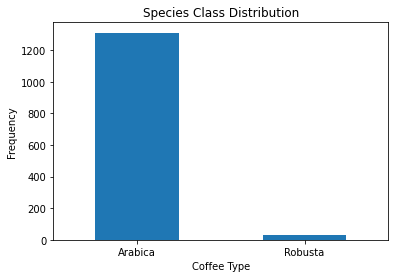

In [9]:
#plot the distributions of arabica and robusta coffees
count_classes = pd.value_counts(df['Species'])

count_classes.plot(kind = 'bar', rot=0)

plt.title("Species Class Distribution")


plt.xlabel("Coffee Type")

plt.ylabel("Frequency")

#### We can see that we are dealing with a highly imbalanced dataset. We may need to apply some sampling techniques before building a classification model.

Text(0, 0.5, 'Country Of Origin')

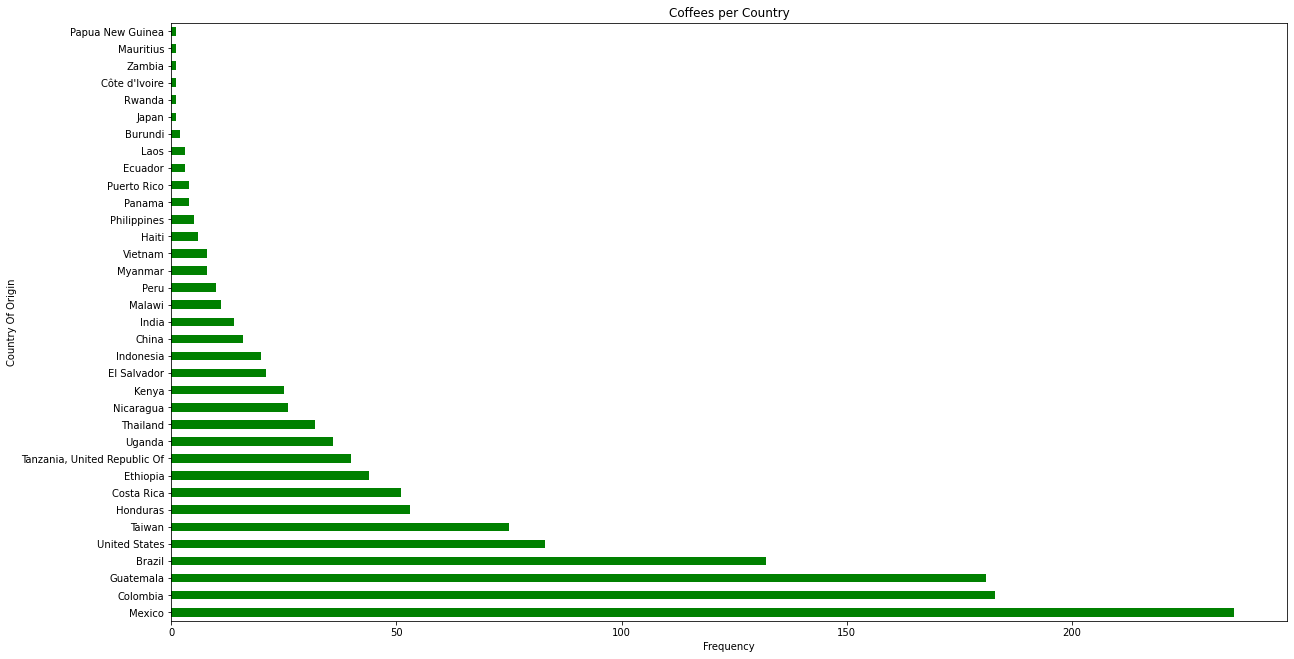

In [10]:
#change the country name of Coted?Ivoire to Côte d'Ivoire
df['Country.of.Origin'] = df['Country.of.Origin'].replace('Cote d?Ivoire',"Côte d'Ivoire")
df['Country.of.Origin'] = df['Country.of.Origin'].replace('United States (Hawaii)','United States')
df['Country.of.Origin'] = df['Country.of.Origin'].replace('United States (Puerto Rico)','Puerto Rico')
#plot the countries of origin
plt.rcParams["figure.figsize"] = (20,11)
df['Country.of.Origin'].value_counts().plot(kind='barh',color='green')
plt.title('Coffees per Country')

plt.xlabel("Frequency")

plt.ylabel("Country Of Origin")

#### From the graph, we can say that over 50 percent of datatset consists of coffee from Mexico,Columbia,Guatemala and Brazil.

#### We will try to visualise country of origins and their total average cupping scores in our dataset.

In [11]:
#Find the average of all total cup points grouping by country name
score_df=df.groupby('Country.of.Origin')['Total.Cup.Points'].mean().reset_index(name='Total_Avg_Points')

#function to convert to alpah2 country codes and continents
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_a2_code, cn_continent)


#The below code is to ge the countries alpha2 code and continent code from the score_df country of origin and append codes
Codes_list=[]
Country_list=[]
Conti_list=[]
for i in score_df['Country.of.Origin']:
    Codes_list.append(get_continent(i))
    Country_list.append(get_continent(i)[0])
    Conti_list.append(get_continent(i)[1])
score_df['codes']=Codes_list
score_df['Country']=Country_list
score_df['Continent']=Conti_list


#function to get longitude and latitude data from country name
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="get_country")
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan

#The below code is to get the coordinates for the countries based on the alpha2 code 
Geolocations=[]
for i in score_df['Country']:
    Geolocations.append(geolocate(i))
    
#add the coordinates column to the score_df dataframe
score_df['Geolocate']=Geolocations

#Let's see the final score dataframe after all these operations
score_df

Country.of.Origin  Total_Avg_Points     codes Country  \
0                         Brazil         82.405909  (BR, SA)      BR   
1                        Burundi         81.830000  (BI, AF)      BI   
2                          China         82.927500  (CN, AS)      CN   
3                       Colombia         83.106557  (CO, SA)      CO   
4                     Costa Rica         82.789020  (CR, NA)      CR   
5                  Côte d'Ivoire         79.330000  (CI, AF)      CI   
6                        Ecuador         80.220000  (EC, SA)      EC   
7                    El Salvador         83.052857  (SV, NA)      SV   
8                       Ethiopia         85.484091  (ET, AF)      ET   
9                      Guatemala         81.846575  (GT, NA)      GT   
10                         Haiti         77.180000  (HT, NA)      HT   
11                      Honduras         79.357547  (HN, NA)      HN   
12                         India         81.082857  (IN, AS)      IN   
13                     Indonesia         82.565500  (ID, AS)      ID   
14                         Japan         84.670000  (JP, AS)      JP   
15                         Kenya         84.309600  (KE, AF)      KE   
16                          Laos         81.833333  (LA, AS)      LA   
17                        Malawi         81.711818  (MW, AF)      MW   
18                     Mauritius         80.500000  (MU, AF)      MU   
19                        Mexico         80.890085  (MX, NA)      MX   
20                       Myanmar         80.750000  (MM, AS)      MM   
21                     Nicaragua         80.458077  (NI, NA)      NI   
22                        Panama         83.707500  (PA, NA)      PA   
23              Papua New Guinea         85.750000  (PG, OC)      PG   
24                          Peru         82.526000  (PE, SA)      PE   
25                   Philippines         80.834000  (PH, AS)      PH   
26                   Puerto Rico         81.727500  (PR, NA)      PR   
27                        Rwanda         82.830000  (RW, AF)      RW   
28                        Taiwan         82.001333  (TW, AS)      TW   
29  Tanzania, United Republic Of         82.369500  (TZ, AF)      TZ   
30                      Thailand         82.573750  (TH, AS)      TH   
31                        Uganda         83.451944  (UG, AF)      UG   
32                 United States         82.135181  (US, NA)      US   
33                       Vietnam         81.208750  (VN, AS)      VN   
34                        Zambia         81.920000  (ZM, AF)      ZM   

   Continent                                Geolocate  
0         SA                     (-10.3333333, -53.2)  
1         AF                  (50.6402809, 4.6667145)  
2         AS                  (35.000074, 104.999927)  
3         SA                  (2.8894434, -73.783892)  
4         NA        (45.22086405, 10.037037979628856)  
5         AF                  (7.9897371, -5.5679458)  
6         SA                (-1.3397668, -79.3666965)  
7         NA                (13.8000382, -88.9140683)  
8         AF                                      NaN  
9         NA                (32.3293809, -83.1137366)  
10        NA                (19.1399952, -72.3570972)  
11        NA                (15.2572432, -86.0755145)  
12        AS                                      NaN  
13        AS                (-2.4833826, 117.8902853)  
14        AS                (36.5748441, 139.2394179)  
15        AF          (-0.1667169, 37.48603689110992)  
16        AS                                      NaN  
17        AF                (-13.2687204, 33.9301963)  
18        AF                (-20.2759451, 57.5703566)  
19        NA               (22.5000485, -100.0000375)  
20        AS                 (17.1750495, 95.9999652)  
21        NA                 (54.5859836, -6.9591554)  
22        NA                  (8.559559, -81.1308434)  
23        OC                (-5.6816069, 144.2489081)  
24        SA          

In [12]:
#There are 3 missing values. Let us manually get the cordinates for the missing countries
#9.1450° N, 40.4897° E  #ET
#20.5937° N, 78.9629° E  #IN
#19.8563° N, 102.4955° E #LA Source:google

#replacing null values with tuples is not easy, so a small workaround to do that 
filler=[1,2,3]
score_df.loc[score_df.Geolocate.isnull(), 'Geolocate'] = filler

m = score_df['Geolocate'].eq(1)
score_df['Geolocate'] = score_df.loc[~m, 'Geolocate'].reindex(m.index, fill_value=(9.1450,40.4897)) #ET

m = score_df['Geolocate'].eq(2)
score_df['Geolocate'] = score_df.loc[~m, 'Geolocate'].reindex(m.index, fill_value=(20.5937,78.9629)) #IN

m = score_df['Geolocate'].eq(3)
score_df['Geolocate'] = score_df.loc[~m, 'Geolocate'].reindex(m.index, fill_value=(19.8563,102.4955)) #LA

#split the Geolocate columns to Latitude and Longitude
score_df[['Latitude', 'Longitude']] = pd.DataFrame(score_df['Geolocate'].tolist(), index=score_df.index)


In [13]:
# Create a world map to show total cupper points for all countries in the dataset
import folium
from folium.plugins import MarkerCluster
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for i in range(len(score_df)):
        lat = score_df.iloc[i]['Latitude']
        long = score_df.iloc[i]['Longitude']
        radius=5
        popup_text = """Country : {}<br>
                    Total Avg Points : {}<br>"""
        popup_text = popup_text.format(score_df.iloc[i]['Country.of.Origin'],
                                   round(score_df.iloc[i]['Total_Avg_Points'],2)
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
#show the map
world_map

#### Here is the world map, you can explore this by zooming in and clicking on the blue coloured circle to get the country name and the total average points.

Text(0.5, 0, 'Average Total Cupping Score')

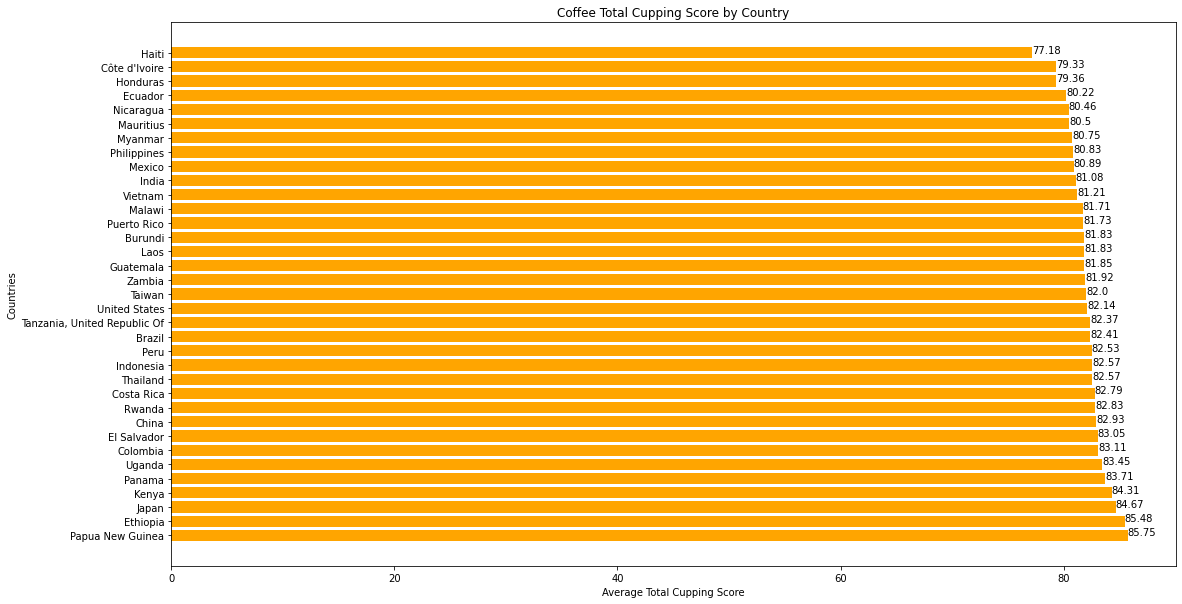

In [14]:
plt.figure(figsize=(18,10))
df_score_desc= score_df.sort_values('Total_Avg_Points',ascending=False)

for index, value in enumerate(df_score_desc['Total_Avg_Points']):
    plt.text(value, index,
             str(round(value,2)))
plt.barh(df_score_desc['Country.of.Origin'],df_score_desc['Total_Avg_Points'],color='orange',)
plt.title('Coffee Total Cupping Score by Country')
plt.ylabel("Countries")
plt.xlabel("Average Total Cupping Score")

#### We can observe from above bar chart that Papua New Guinea has the highest average total cup score followed by Ethiopia and Japan where as Haiti is at the least 

<AxesSubplot:>

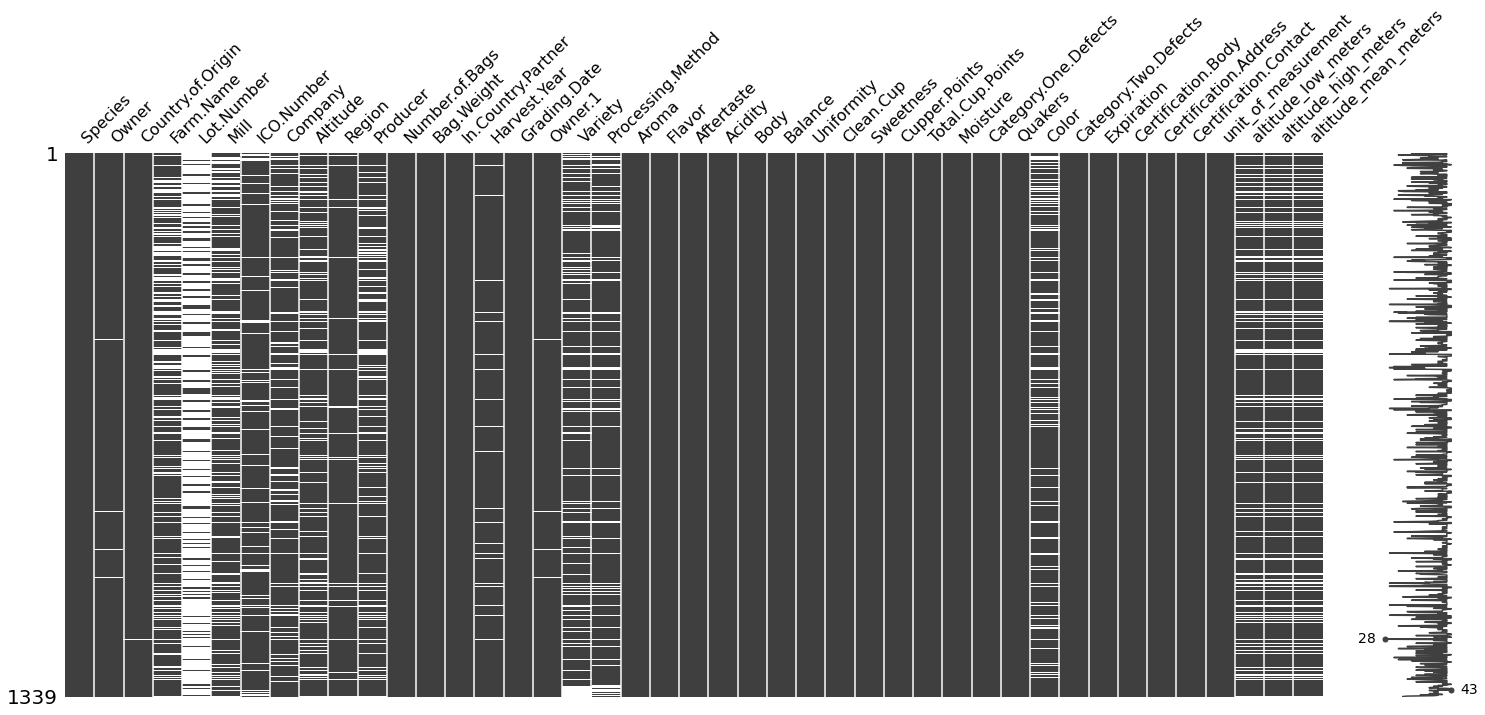

In [15]:
#visualise the missing values
msno.matrix(df)

#### We can observe that the columns like Lot number,Farm Name,altitude_low_meters,altitude_high_meters, altitude_mean_meters,etc have many missing values and we have to remove them. There are some obvious columns like Certification Body, Certification Address,Certification Contact which anyway has to be removed as they contain unidentified text.
#### We shall remove the ICO.Number,Altitude,Region,In Country Partner,Harvest Year,Grading Date from our dataset as it can lead to curse of dimensionality when there are more features and more focus for our problem is on building a good classification model.

#### According to the problem setting and also  [jldbc](https://github.com/jldbc/coffee-quality-database)  I feel 
Aroma
Flavor
Aftertaste
Acidity
Body
Balance
Uniformity
Cup Cleanliness
Sweetness
Moisture
Defects
#### are the important features for the classification model. I also prefer to try with two or more other categorical columns and see if it is making any difference with the correlation matrix.

In [23]:
#Encode arabica as 1 and robusta as 0 for the species column to make it machine ready
df['Species'].replace({'Arabica':1,'Robusta':0},inplace=True)

In [16]:
#Let's clean the dataframe by removing columns as discussed above
df.drop(['Lot.Number','Expiration','Certification.Body',
         'ICO.Number','Altitude','In.Country.Partner',
         'Harvest.Year','Grading.Date','Mill','Bag.Weight',
         'Certification.Address','Certification.Contact'],axis=1,inplace=True)

In [17]:
#check owner and owner.1 columns to remove duplicates
print(df['Owner'].value_counts())
print('----------------------------------------------------')
print(df['Owner.1'].value_counts())

juan luis alvarado romero           155
racafe & cia s.c.a                   60
exportadora de cafe condor s.a       54
kona pacific farmers cooperative     52
ipanema coffees                      50
                                   ... 
bugisu cooperative union              1
jorge francisco martinez hachity      1
ecom japan limited                    1
martin jimenez casiano                1
wayner jimenez                        1
Name: Owner, Length: 315, dtype: int64
----------------------------------------------------
Juan Luis Alvarado Romero           155
Racafe & Cia S.C.A                   60
Exportadora de Cafe Condor S.A       54
Kona Pacific Farmers Cooperative     52
Ipanema Coffees                      50
                                   ... 
CECA,S.A.                             1
Samuel Muhirwa                        1
ROMULO BELLO FLORES                   1
JUAN AVENAMAR RODRIGUEZ FUNEZ         1
ITIAH COFFEE LLC                      1
Name: Owner.1, Length: 319, 

In [18]:
#remove Owner.1 column as its same as Owner
df.drop(['Owner.1'],axis=1,inplace=True)

In [19]:
df['Color'].value_counts()

Green           870
Bluish-Green    114
Blue-Green       85
None             52
Name: Color, dtype: int64

#### Blue-Green and Bluish-Green are same, they have same RGB value. So replace Blue-Green with Bluish-Green

In [20]:
#replace Blue-Green with Bluish Green
df['Color'] = df['Color'].replace('Blue-Green','Bluish-Green')

In [47]:
#Check the missing values now 
df.isnull().sum()

Species                   0
Owner                     7
Country.of.Origin         1
Farm.Name               359
Company                 209
Region                   59
Producer                232
Number.of.Bags            0
Variety                 226
Processing.Method       170
Aroma                     0
Flavor                    0
Aftertaste                0
Acidity                   0
Body                      0
Balance                   0
Uniformity                0
Clean.Cup                 0
Sweetness                 0
Cupper.Points             0
Total.Cup.Points          0
Moisture                  0
Category.One.Defects      0
Quakers                   1
Color                   218
Category.Two.Defects      0
unit_of_measurement       0
altitude_low_meters     230
altitude_high_meters    230
altitude_mean_meters    230
dtype: int64

#### We will first try to convert the altitude columns to km based on the unit of measurement column so that the values have similar scale with other columsn like Aroma,Acidity,Sweetness etc.

In [45]:
df['altitude_low_meters'] = np.where((df.unit_of_measurement == 'm'),df.altitude_low_meters/1000,df.altitude_low_meters)
df['altitude_high_meters'] = np.where((df.unit_of_measurement == 'm'),df.altitude_high_meters/1000,df.altitude_high_meters)
df['altitude_mean_meters'] = np.where((df.unit_of_measurement == 'm'),df.altitude_mean_meters/1000,df.altitude_mean_meters)

df['altitude_low_meters'] = np.where((df.unit_of_measurement == 'ft'),df.altitude_low_meters/3281,df.altitude_low_meters)
df['altitude_high_meters'] = np.where((df.unit_of_measurement == 'ft'),df.altitude_high_meters/3281,df.altitude_high_meters)
df['altitude_mean_meters'] = np.where((df.unit_of_measurement == 'ft'),df.altitude_mean_meters/3281,df.altitude_mean_meters)

In [49]:
#Remove the unit of measurmeent column as we no longer need it
df.drop(['unit_of_measurement'],axis=1,inplace=True)

#### Let us try to impute the missing value in Country of Origin column

In [57]:
#Check the missing value
df[df['Country.of.Origin'].isnull()]

Species               Owner Country.of.Origin Farm.Name Company Region  \
1198        1  racafe & cia s.c.a               NaN       NaN     NaN    NaN   

     Producer  Number.of.Bags Variety Processing.Method  ...  Cupper.Points  \
1198      NaN             149     NaN               NaN  ...           7.25   

      Total.Cup.Points  Moisture  Category.One.Defects  Quakers  Color  \
1198             79.08       0.1                     0      0.0    NaN   

      Category.Two.Defects  altitude_low_meters  altitude_high_meters  \
1198                     3                  NaN                   NaN   

      altitude_mean_meters  
1198                   NaN  

[1 rows x 29 columns]

In [59]:
#Search the dataset to see similar rows with owner as racafe & cia s.c.a
df[df['Owner']=='racafe & cia s.c.a']

Species               Owner Country.of.Origin Farm.Name  \
98          1  racafe & cia s.c.a          Colombia       NaN   
107         1  racafe & cia s.c.a          Colombia       NaN   
108         1  racafe & cia s.c.a          Colombia       NaN   
111         1  racafe & cia s.c.a          Colombia       NaN   
146         1  racafe & cia s.c.a          Colombia       NaN   
147         1  racafe & cia s.c.a          Colombia       NaN   
152         1  racafe & cia s.c.a          Colombia       NaN   
175         1  racafe & cia s.c.a          Colombia       NaN   
184         1  racafe & cia s.c.a          Colombia       NaN   
198         1  racafe & cia s.c.a          Colombia       NaN   
199         1  racafe & cia s.c.a          Colombia       NaN   
212         1  racafe & cia s.c.a          Colombia       NaN   
217         1  racafe & cia s.c.a          Colombia       NaN   
236         1  racafe & cia s.c.a          Colombia       NaN   
250         1  racafe & cia s.c.a          Colombia       NaN   
269         1  racafe & cia s.c.a          Colombia       NaN   
276         1  racafe & cia s.c.a          Colombia       NaN   
300         1  racafe & cia s.c.a          Colombia       NaN   
305         1  racafe & cia s.c.a          Colombia       NaN   
326         1  racafe & cia s.c.a          Colombia       NaN   
338         1  racafe & cia s.c.a          Colombia       NaN   
340         1  racafe & cia s.c.a          Colombia       NaN   
348         1  racafe & cia s.c.a          Colombia       NaN   
357         1  racafe & cia s.c.a          Colombia       NaN   
372         1  racafe & cia s.c.a          Colombia       NaN   
398         1  racafe & cia s.c.a          Colombia       NaN   
399         1  racafe & cia s.c.a          Colombia       NaN   
437         1  racafe & cia s.c.a          Colombia       NaN   
456         1  racafe & cia s.c.a          Colombia       NaN   
468         1  racafe & cia s.c.a          Colombia       NaN   
480         1  racafe & cia s.c.a          Colombia       NaN   
493         1  racafe & cia s.c.a          Colombia       NaN   
514         1  racafe & cia s.c.a          Colombia       NaN   
518         1  racafe & cia s.c.a          Colombia       NaN   
526         1  racafe & cia s.c.a          Colombia       NaN   
528         1  racafe & cia s.c.a          Colombia       NaN   
536         1  racafe & cia s.c.a          Colombia       NaN   
550         1  racafe & cia s.c.a          Colombia       NaN   
558         1  racafe & cia s.c.a          Colombia       NaN   
572         1  racafe & cia s.c.a          Colombia       NaN   
593         1  racafe & cia s.c.a          Colombia       NaN   
604         1  racafe & cia s.c.a          Colombia       NaN   
633         1  racafe & cia s.c.a          Colombia       NaN   
652         1  racafe & cia s.c.a          Colombia       NaN   
672         1  racafe & cia s.c.a          Colombia       NaN   
680         1  racafe & cia s.c.a          Colombia       NaN   
692         1  racafe & cia s.c.a          Colombia       NaN   
754         1  racafe & cia s.c.a          Colombia       NaN   
756         1  racafe & cia s.c.a          Colombia       NaN   
806         1  racafe & cia s.c.a          Colombia       NaN   
815         1  racafe & cia s.c.a          Colombia       NaN   
851         1  racafe & cia s.c.a          Colombia       NaN   
870         1  racafe & cia s.c.a          Colombia       NaN   
877         1  racafe & cia s.c.a          Colombia       NaN   
933         1  racafe & cia s.c.a          Colombia       NaN   
951         1  racafe & cia s.c.a          Colombia       NaN   
1003        1  racafe & cia s.c.a          Colombia       NaN   
1060        1  racafe & cia s.c.a          Colombia       NaN   
1068        1  racafe & cia s.c.a          Colombia       NaN   
1198        1  racafe & cia s.c.a               NaN       NaN   

                     Company     Region 

In [60]:
#Impute the missing value in Country.of.Origin column with 'Columbia' as the owner for all Colombia originated coffees is 'racafe & cia s.c.a'
df['Country.of.Origin']=df['Country.of.Origin'].fillna('Colombia')

#### Let us now impute missing values in the altitude columns based on highest repeated altitude for each Country of Origin.Normally an operation like this is tricky, but thanks to transform , it did the work soon. 

In [69]:
df["altitude_low_meters"] = df.groupby("Country.of.Origin")["altitude_low_meters"].transform(lambda x: x.fillna(x.mode().iloc[0]))
df["altitude_high_meters"] = df.groupby("Country.of.Origin")["altitude_high_meters"].transform(lambda x: x.fillna(x.mode().iloc[0]))
df["altitude_mean_meters"] = df.groupby("Country.of.Origin")["altitude_mean_meters"].transform(lambda x: x.fillna(x.mode().iloc[0]))
            

In [54]:
#Fill the null vlaue in Quakers column with mode value
df['Quakers'] = df['Quakers'].fillna(df['Quakers'].mode()[0])

#### [Click here](http://proceedings.mlr.press/v7/niculescu09/niculescu09.pdf) KDD Cup Orange Challenge.

#### Instead of doing one-hot encoding for all categorical variables which will add many features when there are many cateogrical variables, In the winning solution of the KDD 2009 cup: "Winning the KDD Cup Orange Challenge with Ensemble":
#### The Team suggested using 10 most frequent labels and convert them into dummy variables using one-hot encoding.

In [74]:
def one_hot_encoding_top_x(df, variable, top_x_labels):
    # function to create the dummy variables for the most frequent labels
    # we can vary the number of most frequent labels that we encode
    
    for label in top_x_labels:
        df[variable+'_'+label] = np.where(df[variable]==label, 1, 0)

In [75]:
# let's make a list with the most frequent categories of the variable

top_10_labels = [y for y in df['Country.of.Origin'].value_counts().sort_values(ascending=False).head(10).index]
top_10_labels

['Mexico',
 'Colombia',
 'Guatemala',
 'Brazil',
 'United States',
 'Taiwan',
 'Honduras',
 'Costa Rica',
 'Ethiopia',
 'Tanzania, United Republic Of']

In [77]:
one_hot_encoding_top_x(df, 'Country.of.Origin', top_10_labels)
df.head()

Species                     Owner Country.of.Origin  \
1        1                 metad plc          Ethiopia   
2        1                 metad plc          Ethiopia   
3        1  grounds for health admin         Guatemala   
4        1       yidnekachew dabessa          Ethiopia   
5        1                 metad plc          Ethiopia   

                                  Farm.Name  \
1                                 metad plc   
2                                 metad plc   
3  san marcos barrancas "san cristobal cuch   
4     yidnekachew dabessa coffee plantation   
5                                 metad plc   

                                 Company        Region  \
1      metad agricultural developmet plc  guji-hambela   
2      metad agricultural developmet plc  guji-hambela   
3                                    NaN           NaN   
4  yidnekachew debessa coffee plantation        oromia   
5      metad agricultural developmet plc  guji-hambela   

                                Producer  Number.of.Bags  Variety  \
1                              METAD PLC             300      NaN   
2                              METAD PLC             300    Other   
3                                    NaN               5  Bourbon   
4  Yidnekachew Dabessa Coffee Plantation             320      NaN   
5                              METAD PLC             300    Other   

  Processing.Method  ...  Country.of.Origin_Mexico  \
1      Washed / Wet  ...                         0   
2      Washed / Wet  ...                         0   
3               NaN  ...                         0   
4     Natural / Dry  ...                         0   
5      Washed / Wet  ...                         0   

   Country.of.Origin_Colombia  Country.of.Origin_Guatemala  \
1                           0                            0   
2                           0                            0   
3                           0                            1   
4                           0                            0   
5                           0                            0   

   Country.of.Origin_Brazil  Country.of.Origin_United States  \
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                         0                                0   
5                         0                                0   

   Country.of.Origin_Taiwan  Country.of.Origin_Honduras  \
1                         0                           0   
2                         0                           0   
3                         0                           0   
4                         0                           0   
5                         0                           0   

   Country.of.Origin_Costa Rica  Country.of.Origin_Ethiopia  \
1                             0                           1   
2                             0                           1   
3                             0                           0   
4                             0                           1   
5                             0                           1   

   Country.of.Origin_Tanzania, United Republic Of  
1                                               0  
2                                               0  
3                                               0  
4                                               0  
5                                               0  

[5 rows x 39 columns]

In [84]:
#Let's do the similar one hot encoding for remaining categorical columns

#Owner
top_10_labels = [y for y in df['Owner'].value_counts().sort_values(ascending=False).head(10).index]
one_hot_encoding_top_x(df, 'Owner', top_10_labels)

#Farm.Name
top_10_labels = [y for y in df['Farm.Name'].value_counts().sort_values(ascending=False).head(10).index]
one_hot_encoding_top_x(df, 'Farm.Name', top_10_labels)


#Company
top_10_labels = [y for y in df['Company'].value_counts().sort_values(ascending=False).head(10).index]
one_hot_encoding_top_x(df, 'Company', top_10_labels)



#Region
top_10_labels = [y for y in df['Region'].value_counts().sort_values(ascending=False).head(10).index]
one_hot_encoding_top_x(df, 'Region', top_10_labels)


#Producer

top_10_labels = [y for y in df['Producer'].value_counts().sort_values(ascending=False).head(10).index]
one_hot_encoding_top_x(df, 'Producer', top_10_labels)

#Variety
top_10_labels = [y for y in df['Variety'].value_counts().sort_values(ascending=False).head(10).index]
one_hot_encoding_top_x(df, 'Variety', top_10_labels)




In [90]:
df.drop(['Owner','Country.of.Origin','Farm.Name','Company','Region'
        ,'Producer','Variety','Processing.Method','Color'
        ],axis=1,inplace=True)

In [93]:
### Apply SelectKBest Algorithm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X=df.iloc[:,1:]
y=df['Species']



ordered_rank_features=SelectKBest(score_func=chi2,k='all')
ordered_feature=ordered_rank_features.fit(X,y)
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)
features_rank=pd.concat([dfcolumns,dfscores],axis=1)
features_rank.columns=['Features','Score']
features_rank

Features      Score
0           Number.of.Bags  35.410231
1                    Aroma   0.069693
2                   Flavor   0.046255
3               Aftertaste   0.097147
4                  Acidity   0.055965
..                     ...        ...
84   Variety_Hawaiian Kona   0.939741
85  Variety_Yellow Bourbon   0.747521
86      Variety_Mundo Novo   0.704805
87         Variety_Catimor   0.427155
88            Variety_SL14   0.363082

[89 rows x 2 columns]

In [95]:
features_rank.nlargest(20,'Score')

Features       Score
13             Category.One.Defects  368.275249
0                    Number.of.Bags   35.410231
15             Category.Two.Defects   22.252943
9                         Sweetness   15.514699
79                  Variety_Caturra    5.467582
19         Country.of.Origin_Mexico    5.040427
14                          Quakers    4.954996
80                  Variety_Bourbon    4.826850
81                   Variety_Typica    4.506484
20       Country.of.Origin_Colombia    3.929825
21      Country.of.Origin_Guatemala    3.865751
29  Owner_juan luis alvarado romero    3.310450
22         Country.of.Origin_Brazil    2.819222
59                     Region_huila    2.392067
49     Company_unex guatemala, s.a.    1.836766
60                   Region_oriente    1.708619
24         Country.of.Origin_Taiwan    1.601831
83                   Variety_Catuai    1.580473
61            Region_south of minas    1.452326
62                      Region_kona    1.409611

In [209]:
from sklearn.ensemble import ExtraTreesClassifier

model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [192]:
print(model.feature_importances_)

[0.02952215 0.02242468 0.01933799 0.02517546 0.02035541 0.02272097
 0.04043194 0.02423159 0.03295648 0.5287533  0.02202551 0.03865558
 0.01672677 0.03451785 0.00078805 0.01803211 0.0364912  0.03121392
 0.03563905]


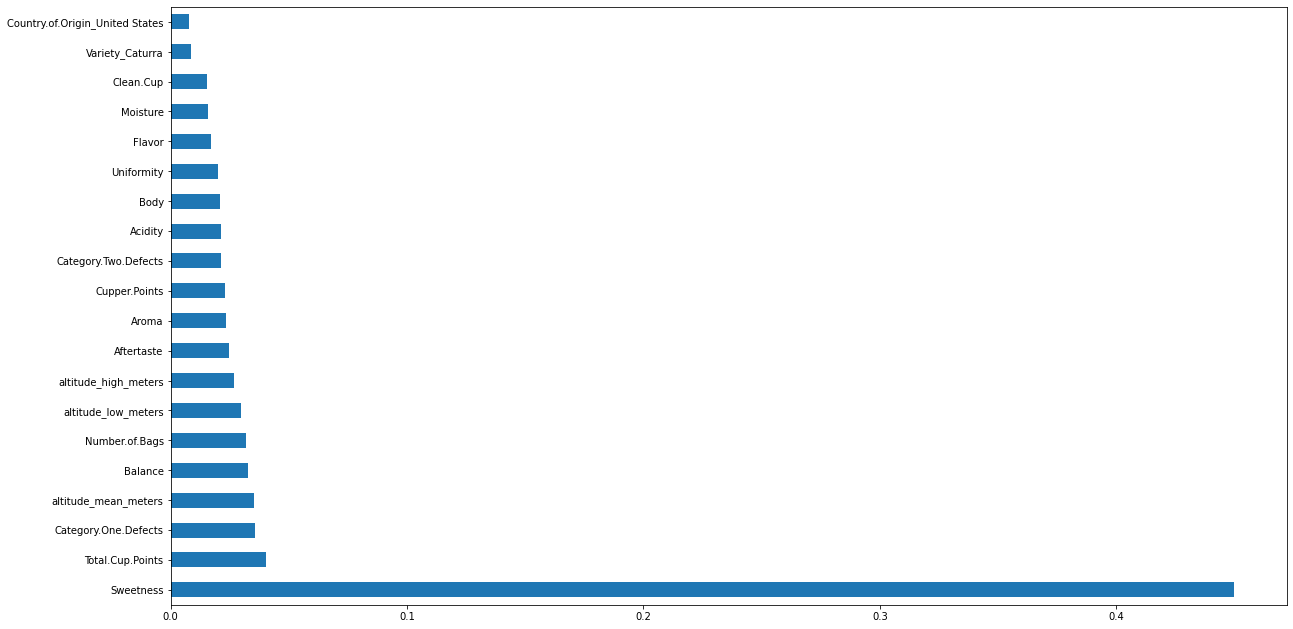

In [211]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [278]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.combine import SMOTETomek

In [161]:
# Implementing Oversampling for Handling Imbalanced 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=6)
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X_train,y_train)

# With over sampling techniques with all features

In [165]:
#logistic Regression
model = LogisticRegression(max_iter=1800)
model.fit(X_res,y_res)
ypred = model.predict(X_test)
evaluation = f1_score(y_test, ypred)
print(evaluation)
print(classification_report(y_test, ypred))

0.994263862332696
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.99      0.99       263

    accuracy                           0.99       268
   macro avg       0.81      0.99      0.88       268
weighted avg       0.99      0.99      0.99       268



In [166]:
#Decision Tree
model_dec = DecisionTreeClassifier()
model_dec.fit(X_res, y_res)
ypred_dec = model_dec.predict(X_test)
evaluation_dec = f1_score(y_test, ypred_dec)
print(evaluation_dec)
print(classification_report(y_test, ypred_dec))

0.9961832061068702
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.99      1.00       263

    accuracy                           0.99       268
   macro avg       0.86      1.00      0.91       268
weighted avg       0.99      0.99      0.99       268



In [245]:
#random forest #95
np.random.seed(79)
model_rf = RandomForestClassifier()
model_rf.fit(X_res, y_res)
ypred_rf = model_rf.predict(X_test)
evaluation = f1_score(y_test, ypred_rf)
print(evaluation)
#draw_cm(y_test,ypred)
print(classification_report(y_test, ypred_rf))
print(confusion_matrix(y_test, ypred_rf))

0.9980952380952381
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      1.00      1.00       263

    accuracy                           1.00       268
   macro avg       0.92      1.00      0.95       268
weighted avg       1.00      1.00      1.00       268

[[  5   0]
 [  1 262]]


# Over sampling with all features end

# All features without oversampling begin

In [195]:

np.random.seed(98)
model = LogisticRegression(max_iter=1800)
model.fit(X_train,y_train)
ypred = model.predict(X_test)
evaluation = f1_score(y_test, ypred)
print(evaluation)
#draw_cm(y_test,ypred)
print(classification_report(y_test, ypred))

0.9980952380952381
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      1.00      1.00       263

    accuracy                           1.00       268
   macro avg       0.92      1.00      0.95       268
weighted avg       1.00      1.00      1.00       268



In [250]:
np.random.seed(5)
model_dec = DecisionTreeClassifier()
model_dec.fit(X_train, y_train)
ypred_dec = model_dec.predict(X_test)
evaluation_dec = f1_score(y_test, ypred_dec)
print(evaluation_dec)
print(classification_report(y_test, ypred_dec))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00       263

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



In [251]:
np.random.seed(94)
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
ypred_rf = model_rf.predict(X_test)
evaluation = f1_score(y_test, ypred_rf)
print(evaluation)
print(classification_report(y_test, ypred_rf))
#draw_cm(y_test,ypred)

0.9981024667931689
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      1.00      1.00       263

    accuracy                           1.00       268
   macro avg       1.00      0.90      0.94       268
weighted avg       1.00      1.00      1.00       268



# All features without oversampling end

# Chi square test selected features without oversampling begin

In [130]:
X1=df[['Category.One.Defects','Number.of.Bags','Category.Two.Defects','Sweetness','Variety_Caturra',
               'Country.of.Origin_Mexico','Quakers','Variety_Bourbon','Variety_Typica',
       'Country.of.Origin_Colombia']]

In [135]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y, test_size=0.20, random_state=8)

In [198]:
np.random.seed(94)
model = LogisticRegression(max_iter=1000)
model.fit(X1_train,y1_train)
ypred = model.predict(X1_test)
evaluation = f1_score(y1_test, ypred)
print(evaluation)
print(classification_report(y1_test, ypred))
#draw_cm(y_test,ypred)

0.9961977186311787
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       1.00      1.00      1.00       263

    accuracy                           0.99       268
   macro avg       0.90      0.90      0.90       268
weighted avg       0.99      0.99      0.99       268



In [201]:
np.random.seed(95)
model_dec = DecisionTreeClassifier()
model_dec.fit(X1_train, y1_train)
ypred_dec = model_dec.predict(X1_test)
evaluation_dec = f1_score(y1_test, ypred_dec)
print(evaluation_dec)
print(classification_report(y1_test, ypred_dec))

0.9962121212121212
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.99      1.00      1.00       263

    accuracy                           0.99       268
   macro avg       1.00      0.80      0.87       268
weighted avg       0.99      0.99      0.99       268



In [208]:
np.random.seed(95)
model_rf = RandomForestClassifier()
model_rf.fit(X1_train, y1_train)
ypred_rf = model_rf.predict(X1_test)
evaluation = f1_score(y1_test, ypred_rf)
evaluation
#draw_cm(y_test,ypred)
print(classification_report(y1_test, ypred_rf))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.99      1.00      1.00       263

    accuracy                           0.99       268
   macro avg       1.00      0.80      0.87       268
weighted avg       0.99      0.99      0.99       268



# Chi sqaure test selected features without oversampling end

# Extra Trees Regressor selected features without oversampling begin

In [212]:
X2=df[['Sweetness','Total.Cup.Points','Category.One.Defects','altitude_mean_meters',
               'Balance','Number.of.Bags','altitude_low_meters','altitude_high_meters',
       'Aftertaste','Aroma','Cupper.Points','Acidity','Body',
      'Category.Two.Defects','Uniformity','Flavor','Moisture','Clean.Cup']]

In [213]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y, test_size=0.20, random_state=8)

In [252]:
np.random.seed(94)
model = LogisticRegression(max_iter=1000)
model.fit(X2_train,y2_train)
ypred = model.predict(X2_test)
evaluation = f1_score(y2_test, ypred)
print(evaluation)
#draw_cm(y_test,ypred)
print(classification_report(y2_test, ypred))

0.9981024667931689
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      1.00      1.00       263

    accuracy                           1.00       268
   macro avg       1.00      0.90      0.94       268
weighted avg       1.00      1.00      1.00       268



In [253]:
np.random.seed(94)
model_dec = DecisionTreeClassifier()
model_dec.fit(X2_train, y2_train)
ypred_dec = model_dec.predict(X2_test)
evaluation_dec = f1_score(y2_test, ypred_dec)
print(evaluation_dec)
print(classification_report(y2_test, ypred_dec))

0.9962121212121212
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.99      1.00      1.00       263

    accuracy                           0.99       268
   macro avg       1.00      0.80      0.87       268
weighted avg       0.99      0.99      0.99       268



In [255]:
np.random.seed(95)
model_rf = RandomForestClassifier()
model_rf.fit(X2_train, y2_train)
ypred_rf = model_rf.predict(X2_test)
evaluation = f1_score(y2_test, ypred_rf)
print(evaluation)
print(classification_report(y2_test, ypred_rf))

0.9981024667931689
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      1.00      1.00       263

    accuracy                           1.00       268
   macro avg       1.00      0.90      0.94       268
weighted avg       1.00      1.00      1.00       268



# Extra Trees Regressor selected features without oversampling End

# Chi sqaure test selected features with oversampling begin

In [220]:
X1=df[['Category.One.Defects','Number.of.Bags','Category.Two.Defects','Sweetness','Variety_Caturra',
               'Country.of.Origin_Mexico','Quakers','Variety_Bourbon','Variety_Typica',
       'Country.of.Origin_Colombia']]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y, test_size=0.20, random_state=8)
smk = SMOTETomek(random_state=42)
X1_res,y1_res=smk.fit_resample(X1_train,y1_train)

In [256]:
np.random.seed(95)
model = LogisticRegression(max_iter=1000)
model.fit(X1_res,y1_res)
ypred = model.predict(X1_test)
evaluation = f1_score(y1_test, ypred)
print(evaluation)
print(classification_report(y1_test, ypred))
#draw_cm(y_test,ypred)

0.9961832061068702
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.99      1.00       263

    accuracy                           0.99       268
   macro avg       0.86      1.00      0.91       268
weighted avg       0.99      0.99      0.99       268



In [259]:
np.random.seed(95)
model_dec = DecisionTreeClassifier()
model_dec.fit(X1_res, y1_res)
ypred_dec = model_dec.predict(X1_test)
evaluation_dec = f1_score(y1_test, ypred_dec)
print(evaluation_dec)
print(classification_report(y1_test, ypred_dec))

0.9962121212121212
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.99      1.00      1.00       263

    accuracy                           0.99       268
   macro avg       1.00      0.80      0.87       268
weighted avg       0.99      0.99      0.99       268



In [261]:
np.random.seed(98)
model_rf = RandomForestClassifier()
model_rf.fit(X1_res, y1_res)
ypred_rf = model_rf.predict(X1_test)
evaluation = f1_score(y1_test, ypred_rf)
evaluation
#draw_cm(y_test,ypred)
print(classification_report(y1_test, ypred_rf))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.99      1.00      1.00       263

    accuracy                           0.99       268
   macro avg       1.00      0.80      0.87       268
weighted avg       0.99      0.99      0.99       268



# Chi sqaure test selected features with oversampling end

# Extra Trees Regressor selected features with oversampling begin

In [262]:
X2=df[['Sweetness','Total.Cup.Points','Category.One.Defects','altitude_mean_meters',
               'Balance','Number.of.Bags','altitude_low_meters','altitude_high_meters',
       'Aftertaste','Aroma','Cupper.Points','Acidity','Body',
      'Category.Two.Defects','Uniformity','Flavor','Moisture','Clean.Cup']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y, test_size=0.20, random_state=8)
smk = SMOTETomek(random_state=42)
X2_res,y2_res=smk.fit_resample(X2_train,y2_train)

In [267]:
np.random.seed(8)
model = LogisticRegression(max_iter=1500)
model.fit(X2_res,y2_res)
ypred = model.predict(X2_test)
evaluation = f1_score(y2_test, ypred)
print(evaluation)
#draw_cm(y_test,ypred)
print(classification_report(y2_test, ypred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00       263

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



In [269]:
np.random.seed(95)
model_dec = DecisionTreeClassifier()
model_dec.fit(X2_res, y2_res)
ypred_dec = model_dec.predict(X2_test)
evaluation_dec = f1_score(y2_test, ypred_dec)
print(evaluation_dec)
print(classification_report(y2_test, ypred_dec))

0.9962121212121212
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.99      1.00      1.00       263

    accuracy                           0.99       268
   macro avg       1.00      0.80      0.87       268
weighted avg       0.99      0.99      0.99       268



In [271]:
np.random.seed(95)
model_rf = RandomForestClassifier()
model_rf.fit(X2_res, y2_res)
ypred_rf = model_rf.predict(X2_test)
evaluation = f1_score(y2_test, ypred_rf)
print(evaluation)
#draw_cm(y_test,ypred)
print(classification_report(y2_test, ypred_rf))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00       263

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



# Extra Trees Regressor selected features with oversampling End

In [285]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=6)
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X_train,y_train)

In [286]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X2_res,y2_res)

d:\anaconda_uj\envs\coffeeprediction\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan 0.94602529        nan 0.96694578        nan 0.96858135
        nan 0.96858135        nan 0.96388379]
  category=UserWarning
d:\anaconda_uj\envs\coffeeprediction\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [287]:
y_pred=clf.predict(X2_test)
print(confusion_matrix(y2_test,y_pred))
print(accuracy_score(y2_test,y_pred))
print(classification_report(y2_test,y_pred))

[[  5   0]
 [  1 262]]
0.996268656716418
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      1.00      1.00       263

    accuracy                           1.00       268
   macro avg       0.92      1.00      0.95       268
weighted avg       1.00      1.00      1.00       268



In [288]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import  BaggingClassifier

In [302]:

np.random.seed(95)
model_bc = BaggingClassifier(PassiveAggressiveClassifier(C=5.2))
model_bc.fit(X2_res, y2_res)
ypred_bc = model_bc.predict(X2_test)
evaluation = f1_score(y2_test, ypred_bc)
print(evaluation)
#draw_cm(y_test,ypred)
print(confusion_matrix(y2_test,ypred_bc))
print(classification_report(y2_test, ypred_bc))

1.0
[[  5   0]
 [  0 263]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00       263

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



# Trying with original features assumed


In [303]:
X3=df[['Sweetness','Total.Cup.Points','Category.One.Defects',
               'Balance','Aftertaste','Aroma','Cupper.Points','Acidity','Body',
      'Category.Two.Defects','Uniformity','Flavor','Moisture','Clean.Cup']]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y, test_size=0.20, random_state=80)
smk = SMOTETomek(random_state=42)
X3_res,y3_res=smk.fit_resample(X3_train,y3_train)

In [316]:
np.random.seed(96)
model = LogisticRegression(max_iter=1500)
model.fit(X3_res,y3_res)
ypred = model.predict(X3_test)
evaluation = f1_score(y3_test, ypred)
print(evaluation)
#draw_cm(y_test,ypred)
print(confusion_matrix(y3_test,ypred))
print(classification_report(y3_test, ypred))

0.9981024667931689
[[  4   0]
 [  1 263]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      1.00      1.00       264

    accuracy                           1.00       268
   macro avg       0.90      1.00      0.94       268
weighted avg       1.00      1.00      1.00       268



In [318]:
np.random.seed(96)
model_dec = DecisionTreeClassifier()
model_dec.fit(X3_res, y3_res)
ypred_dec = model_dec.predict(X3_test)
evaluation_dec = f1_score(y3_test, ypred_dec)
print(evaluation_dec)
print(classification_report(y3_test, ypred_dec))

0.9981024667931689
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      1.00      1.00       264

    accuracy                           1.00       268
   macro avg       0.90      1.00      0.94       268
weighted avg       1.00      1.00      1.00       268



In [323]:
np.random.seed(96)
model_rf = RandomForestClassifier()
model_rf.fit(X3_res, y3_res)
ypred_rf = model_rf.predict(X3_test)
evaluation = f1_score(y3_test, ypred_rf)
print(evaluation)
#draw_cm(y_test,ypred)
print(matthews_corrcoef(y3_test, ypred_rf))
print(classification_report(y3_test, ypred_rf))

1.0
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00       264

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



d:\anaconda_uj\envs\coffeeprediction\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26519 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda_uj\envs\coffeeprediction\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21746 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda_uj\envs\coffeeprediction\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 35946 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda_uj\envs\coffeeprediction\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26519 missing from current font.
  font.set_text(s, 0, flags=flags)
d:\anaconda_uj\envs\coffeeprediction\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 21746 missing from current font.
  font.set_text(s, 0, flags=flags)
d:\anaconda_uj\envs\coffeeprediction\lib\site-packages\matplotlib\bac

<AxesSubplot:>

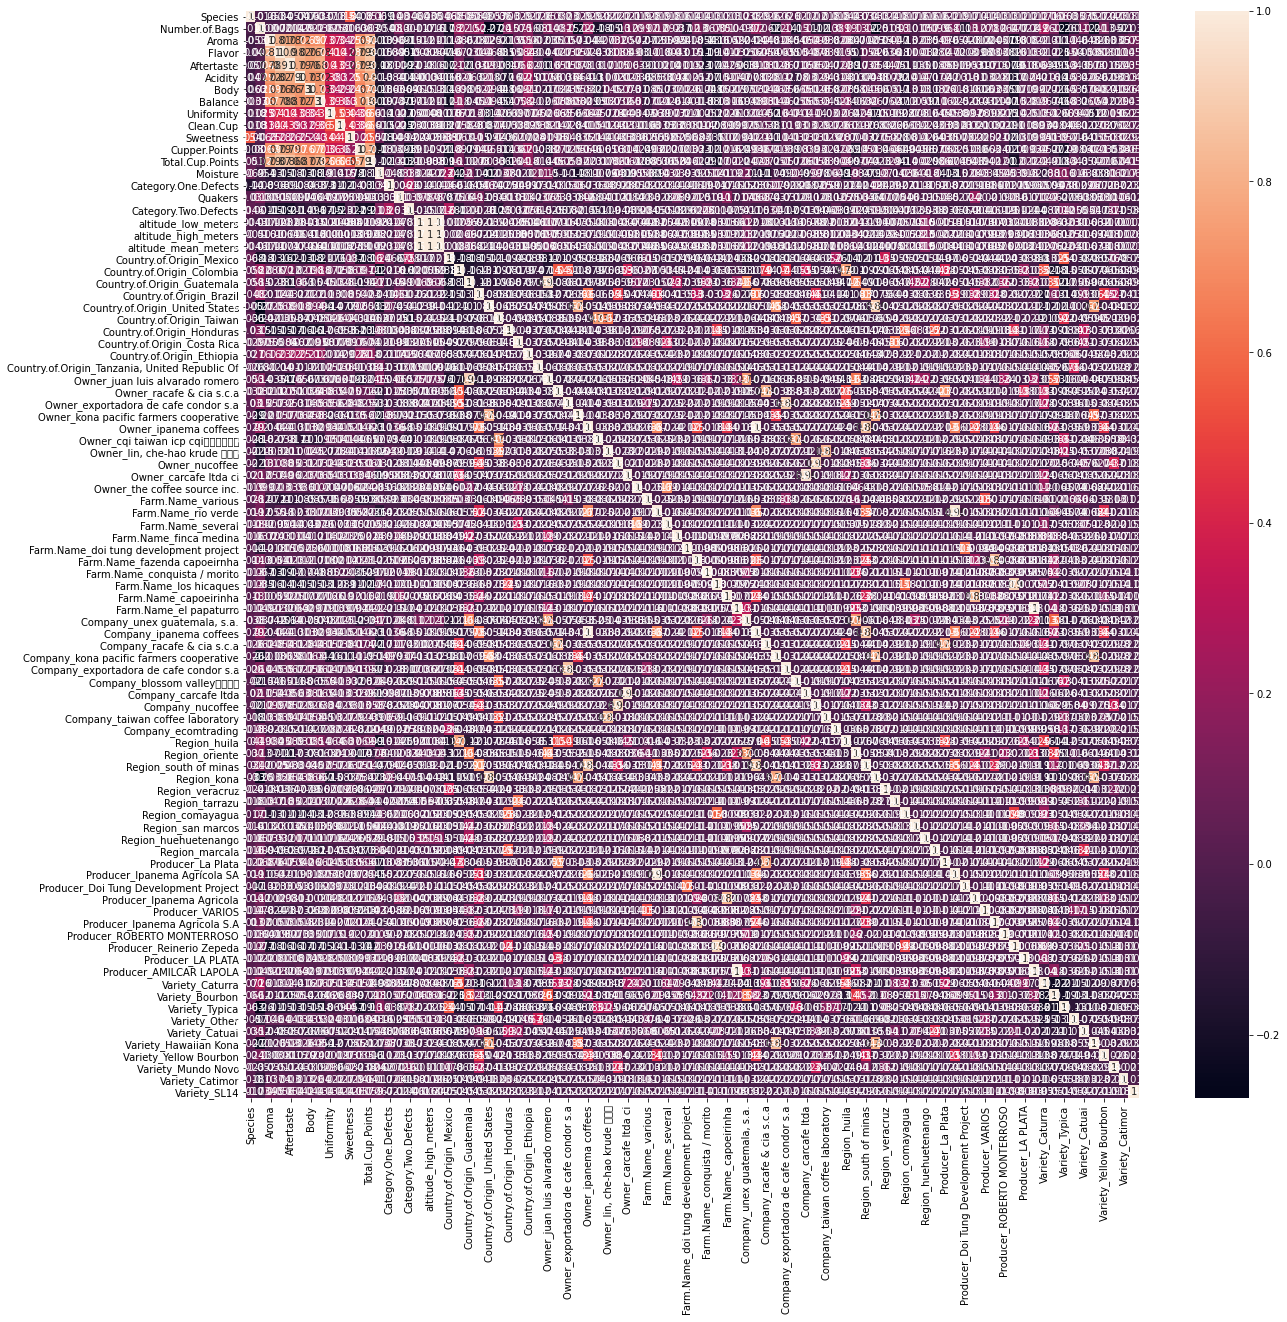

In [103]:
corr=df.iloc[:,:].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)

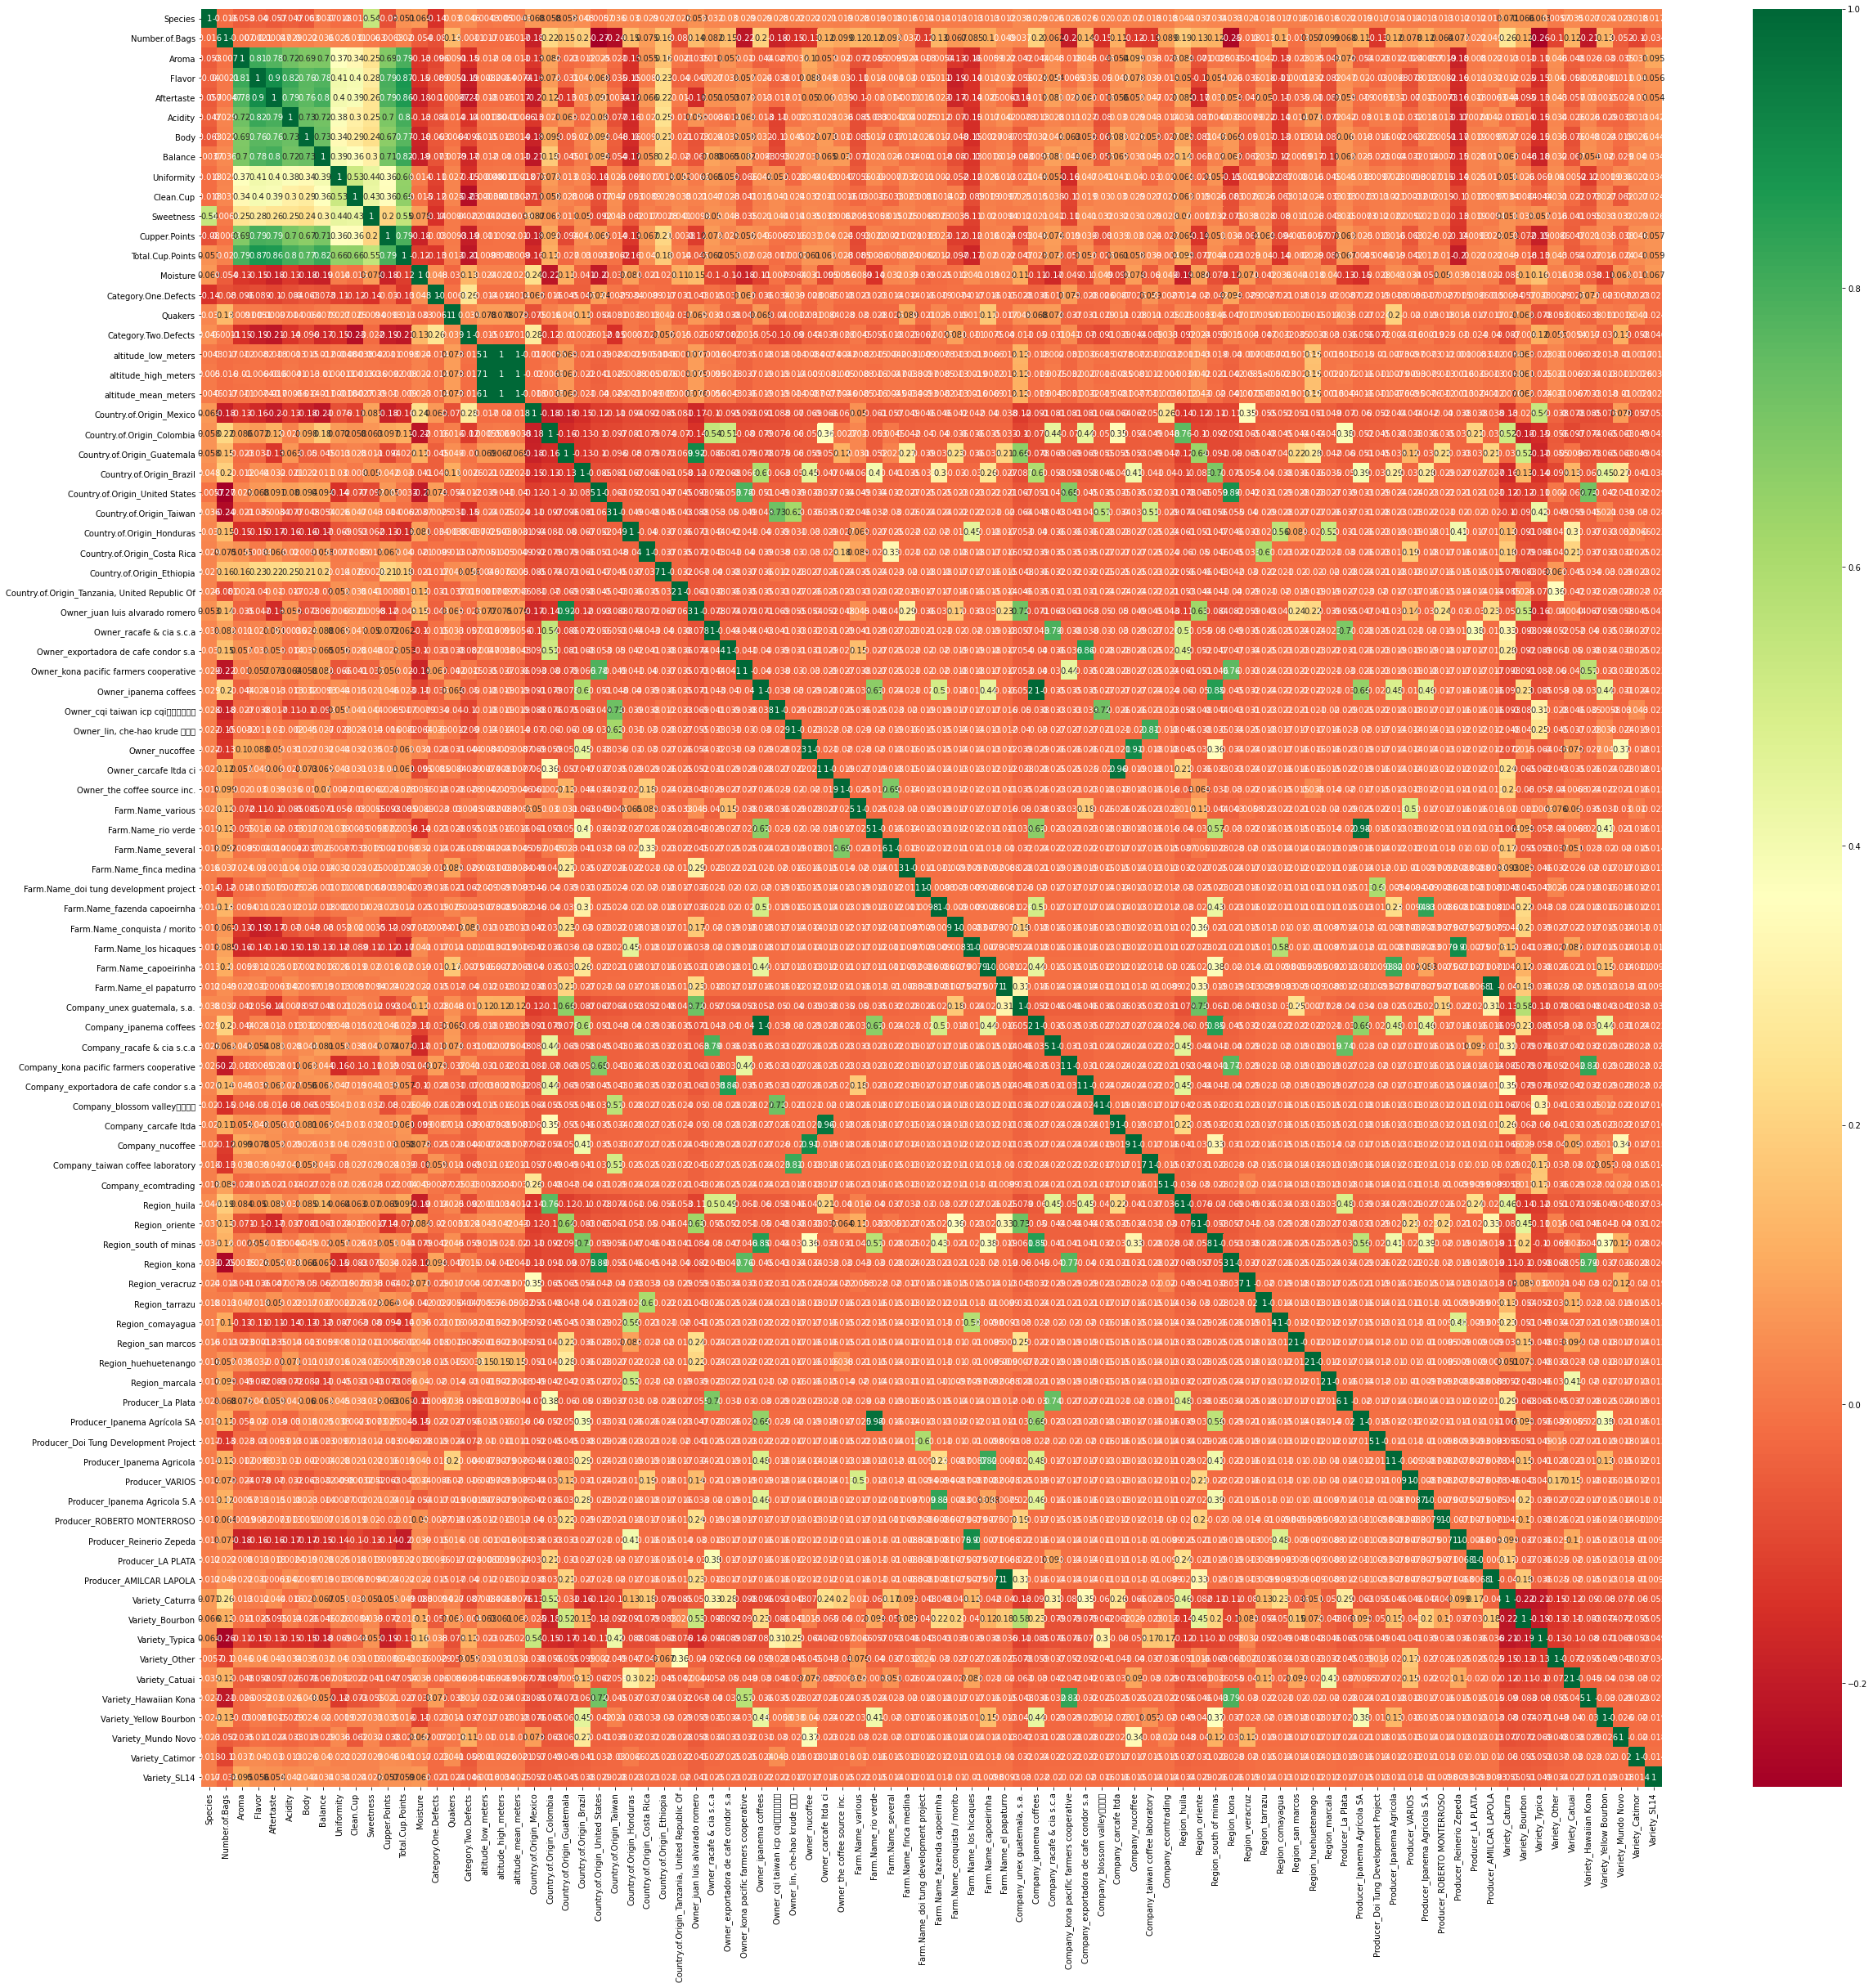

In [104]:
#X = data.iloc[:,0:20]  #independent columns
#y = data.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(40,40))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, classification_report

In [120]:
# a helper function to draw confusion matrices
def draw_cm(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  df_cm = pd.DataFrame(cm_norm)
  plt.figure(figsize = (6,4))
  sns.heatmap(df_cm, annot=True, cmap="Blues")
  plt.xlabel("Predicted class")
  plt.ylabel("True class")
  plt.show()
  print("Accuracy: {0:.3f}".format(accuracy_score(y_test, y_pred)))
  print("Recall: {0:.3f}".format(recall_score(y_test, y_pred)))

In [78]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [92]:
# Implementing Oversampling for Handling Imbalanced 
X= combined_df.drop('Species', axis = 1)
Y=combined_df['Species']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=0)
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X_train,y_train)

In [93]:
print(X.shape,Y.shape)

(1339, 12) (1339,)


In [94]:
print(X_train.shape,y_train.shape)

(1071, 12) (1071,)


In [95]:
print(X_test.shape,y_test.shape)

(268, 12) (268,)


In [96]:
y_train.value_counts()

1    1049
0      22
Name: Species, dtype: int64

In [97]:
y_res.value_counts()

1    1049
0    1049
Name: Species, dtype: int64

In [ ]:
combined_df = combined_df.sample(frac=1).reset_index(drop=True)

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

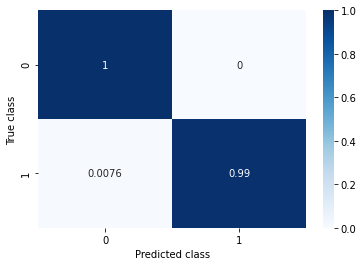

Accuracy: 0.993
Recall: 0.992


In [133]:
model = LogisticRegression(max_iter=500)
model.fit(X_res, y_res)
ypred = model.predict(X_test)
evaluation = f1_score(y_test, ypred)
evaluation
draw_cm(y_test,ypred)

In [134]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, ypred)

0.8627136310272983

In [112]:
print(classification_report(y_test, ypred, target_names=['Robusta','Arabica']))

              precision    recall  f1-score   support

     Robusta       0.75      1.00      0.86         6
     Arabica       1.00      0.99      1.00       262

    accuracy                           0.99       268
   macro avg       0.88      1.00      0.93       268
weighted avg       0.99      0.99      0.99       268



In [113]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.99      1.00       262

    accuracy                           0.99       268
   macro avg       0.88      1.00      0.93       268
weighted avg       0.99      0.99      0.99       268



In [101]:
confusion_matrix(y_test, ypred)

array([[  6,   0],
       [  2, 260]], dtype=int64)

In [129]:
X_train[['Flavor','Acidity']]

Flavor  Acidity
813     7.33     7.42
1036    7.33     6.83
194     7.75     7.92
240     7.75     7.75
1169    6.92     7.42
...      ...      ...
763     7.50     7.42
835     7.50     7.50
1216    7.17     7.58
559     7.58     7.58
684     7.50     7.67

[1071 rows x 2 columns]

0.9980952380952381


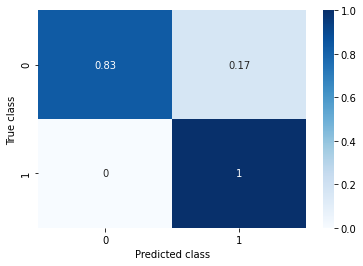

Accuracy: 0.996
Recall: 1.000


In [139]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
ypred = model.predict(X_test)
evaluation = f1_score(y_test, ypred)
print(evaluation)
draw_cm(y_test,ypred)

In [140]:
matthews_corrcoef(y_test, ypred)

0.9111337802573134

In [131]:
print(classification_report(y_test, ypred, target_names=['Robusta','Arabica']))

              precision    recall  f1-score   support

     Robusta       0.00      0.00      0.00         6
     Arabica       0.98      0.99      0.98       262

    accuracy                           0.97       268
   macro avg       0.49      0.50      0.49       268
weighted avg       0.96      0.97      0.96       268



In [116]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       1.00      1.00      1.00       262

    accuracy                           1.00       268
   macro avg       1.00      0.92      0.95       268
weighted avg       1.00      1.00      1.00       268



In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#wrf = RandomForestClassifier(class_weight='balanced_subsample', random_state=42)

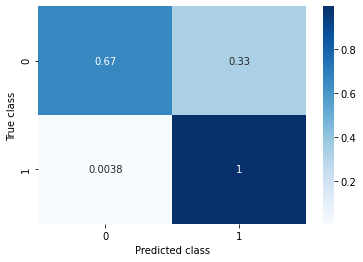

Accuracy: 0.989
Recall: 0.996


In [137]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
ypred = model.predict(X_test)
evaluation = f1_score(y_test, ypred)
evaluation
draw_cm(y_test,ypred)

In [138]:
matthews_corrcoef(y_test, ypred)

0.7247338923878783

In [118]:
print(classification_report(y_test, ypred, target_names=['Robusta','Arabica']))

              precision    recall  f1-score   support

     Robusta       0.86      1.00      0.92         6
     Arabica       1.00      1.00      1.00       262

    accuracy                           1.00       268
   macro avg       0.93      1.00      0.96       268
weighted avg       1.00      1.00      1.00       268



In [119]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00       262

    accuracy                           1.00       268
   macro avg       0.93      1.00      0.96       268
weighted avg       1.00      1.00      1.00       268



In [132]:
#descision tree
confusion_matrix(y_test, ypred)


array([[  0,   6],
       [  2, 260]], dtype=int64)

In [105]:
#Random Forest
confusion_matrix(y_test, ypred)


array([[  6,   0],
       [  1, 261]], dtype=int64)

In [ ]:
#set the random seed for reproducibility of results
np.random.seed(93)

#select the model
model_rf = RandomForestClassifier()

#fit the model
model_rf.fit(X_res, y_res)

#test the model
ypred_rf = model_rf.predict(X_test)

#find the f1-score
evaluation = f1_score(y_test, ypred_rf)
print(evaluation)

#find the matthwes correlation coefficient
print(matthews_corrcoef(y_test, ypred_rf))

#print the classfication report
print(classification_report(y_test, ypred_rf))

#print the confusion matrix
print(confusion_matrix(y_test, ypred_rf))

In [ ]:
#select the model
rfc=RandomForestClassifier(random_state=93)

#define the parameters for the GridSearchCV
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

#initialise and fit the model
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_res, y_res)

In [ ]:
#print the best parameters
CV_rfc.best_params_